# Análisis de datos HAR

## Descargar los datos

Descargar la base de datos de [aquí](https://archive.ics.uci.edu/dataset/344/heterogeneity+activity+recognition)!

## Importar las librerías necesarias y cargar los datos en dataframes

🔹 **Qué hacer:**  
- Importa las librerías básicas necesarias para el análisis de datos 
- Carga los siguientes archivos CSV en diferentes DataFrames:
  - `Phones_accelerometer.csv`
  - `Phones_gyroscope.csv`
  - `Watch_accelerometer.csv`
  - `Watch_gyroscope.csv`

In [2]:
# Solucion
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

path_directorio = '/home/asier/Escritorio/GitHub/homework_micro/Activity recognition exp/Activity recognition exp'

# Cargar los datos
Phones_accelerometer = pd.read_csv(f'{path_directorio}/Phones_accelerometer.csv')
Phones_gyroscope = pd.read_csv(f'{path_directorio}/Phones_gyroscope.csv')
Watch_accelerometer = pd.read_csv(f'{path_directorio}/Watch_accelerometer.csv')
Watch_gyroscope = pd.read_csv(f'{path_directorio}/Watch_gyroscope.csv')

## Ejercicio 1: Cargar y explorar los datos del acelerómetro de los teléfonos

**Trabajaremos inicialmente con el acelerómetro del teléfono (`df_subset_ph_acc`).**


🔹 **Qué hacer:** 
- Mostrar las primeras 5 filas.
- Hacer un gráfico de barras que muestre la distribucion de muestras por actividad

🔹 **¿Por qué es importante?:** Entender la estructura y el contenido del dataset.

🔹 **Preguntas de reflexión:**
- ¿Todas las columnas parecen relevantes para modelar actividades?
- ¿Hay columnas que parecen ser tiempo o identificadores?

In [3]:
# Solución
print(Phones_accelerometer.head())
print(Phones_accelerometer['gt'].value_counts())

# Gráfico de barras de la distribución de muestras por actividad
walk = Phones_accelerometer[Phones_accelerometer['gt'] == 'walk']
sit = Phones_accelerometer[Phones_accelerometer['gt'] == 'sit']
stand = Phones_accelerometer[Phones_accelerometer['gt'] == 'stand']
bike = Phones_accelerometer[Phones_accelerometer['gt'] == 'bike']
up = Phones_accelerometer[Phones_accelerometer['gt'] == 'stairsup']
down = Phones_accelerometer[Phones_accelerometer['gt'] == 'stairsdown']

   Index   Arrival_Time        Creation_Time         x         y         z  \
0      0  1424696633908  1424696631913248572 -5.958191  0.688065  8.135345   
1      1  1424696633909  1424696631918283972 -5.952240  0.670212  8.136536   
2      2  1424696633918  1424696631923288855 -5.995087  0.653549  8.204376   
3      3  1424696633919  1424696631928385290 -5.942718  0.676163  8.128204   
4      4  1424696633929  1424696631933420691 -5.991516  0.641647  8.135345   

  User   Model    Device     gt  
0    a  nexus4  nexus4_1  stand  
1    a  nexus4  nexus4_1  stand  
2    a  nexus4  nexus4_1  stand  
3    a  nexus4  nexus4_1  stand  
4    a  nexus4  nexus4_1  stand  
gt
walk          2192401
sit           1991919
stand         1851492
bike          1845557
stairsup      1782010
stairsdown    1615896
Name: count, dtype: int64


**Interpretación:**



**Visualización extra:** Distribución de muestras por actividad.

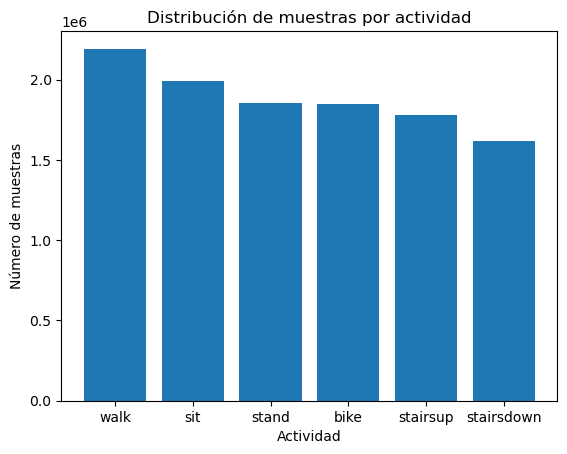

In [4]:
# Solución
activities = ['walk', 'sit', 'stand', 'bike', 'stairsup', 'stairsdown']
counts = [len(walk), len(sit), len(stand), len(bike), len(up), len(down)]
plt.bar(activities,counts)
plt.xlabel('Actividad')
plt.ylabel('Número de muestras')
plt.title('Distribución de muestras por actividad')
plt.show()

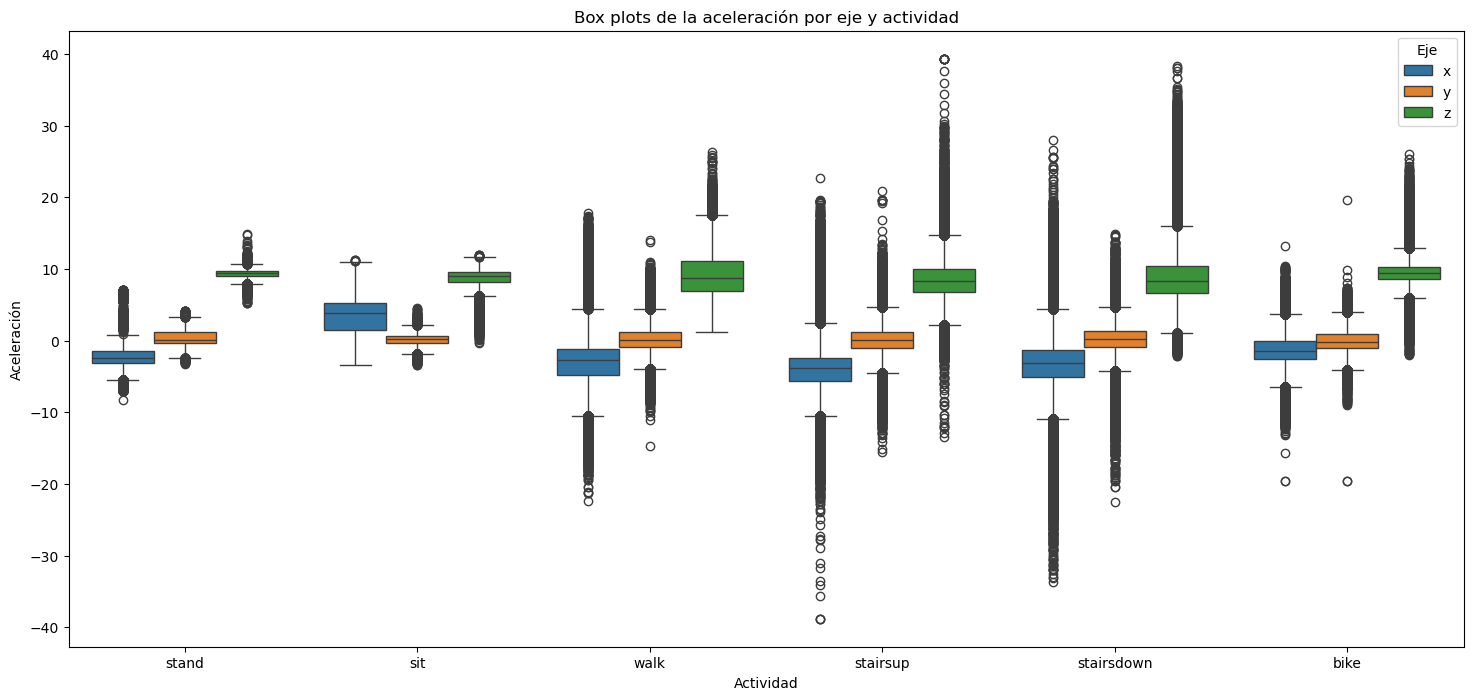

In [5]:
# Box plots por actividad 

# Preparar los datos para el boxplot
df_melted = pd.melt(Phones_accelerometer, id_vars=['gt'], value_vars=['x', 'y', 'z'], var_name='axis', value_name='acceleration')

# Crear el boxplot
plt.figure(figsize=(18, 8))
sns.boxplot(x='gt', y='acceleration', hue='axis', data=df_melted)
plt.title('Box plots de la aceleración por eje y actividad')
plt.xlabel('Actividad')
plt.ylabel('Aceleración')
plt.legend(title='Eje')
plt.show()

           gt         x         y         z
0        bike -1.337308 -0.068326  9.399014
1         sit  3.762870  0.155249  8.438220
2  stairsdown -3.216161  0.198635  8.869204
3    stairsup -3.903135  0.124511  8.482344
4       stand -2.419891  0.353311  9.194293
5        walk -2.909116  0.158189  9.070242


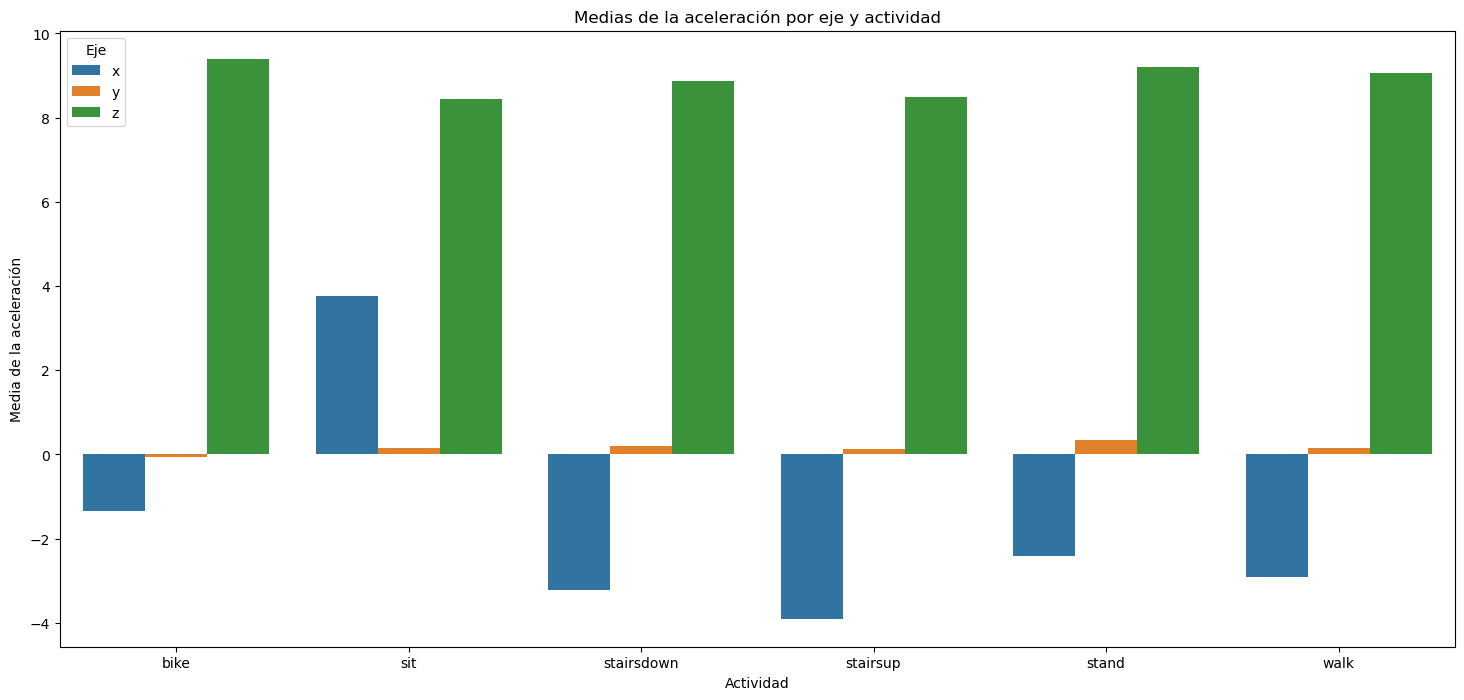

In [7]:
# Barras de medias por ejes y por actividad
mean_values = Phones_accelerometer.groupby('gt')[['x', 'y', 'z']].mean().reset_index()
print(mean_values)
mean_values_melted = pd.melt(mean_values, id_vars=['gt'], value_vars=['x', 'y', 'z'], var_name='axis', value_name='mean_acceleration')
plt.figure(figsize=(18, 8))
sns.barplot(x='gt', y='mean_acceleration', hue='axis', data=mean_values_melted)
plt.title('Medias de la aceleración por eje y actividad')
plt.xlabel('Actividad')
plt.ylabel('Media de la aceleración')
plt.legend(title='Eje')
plt.show()

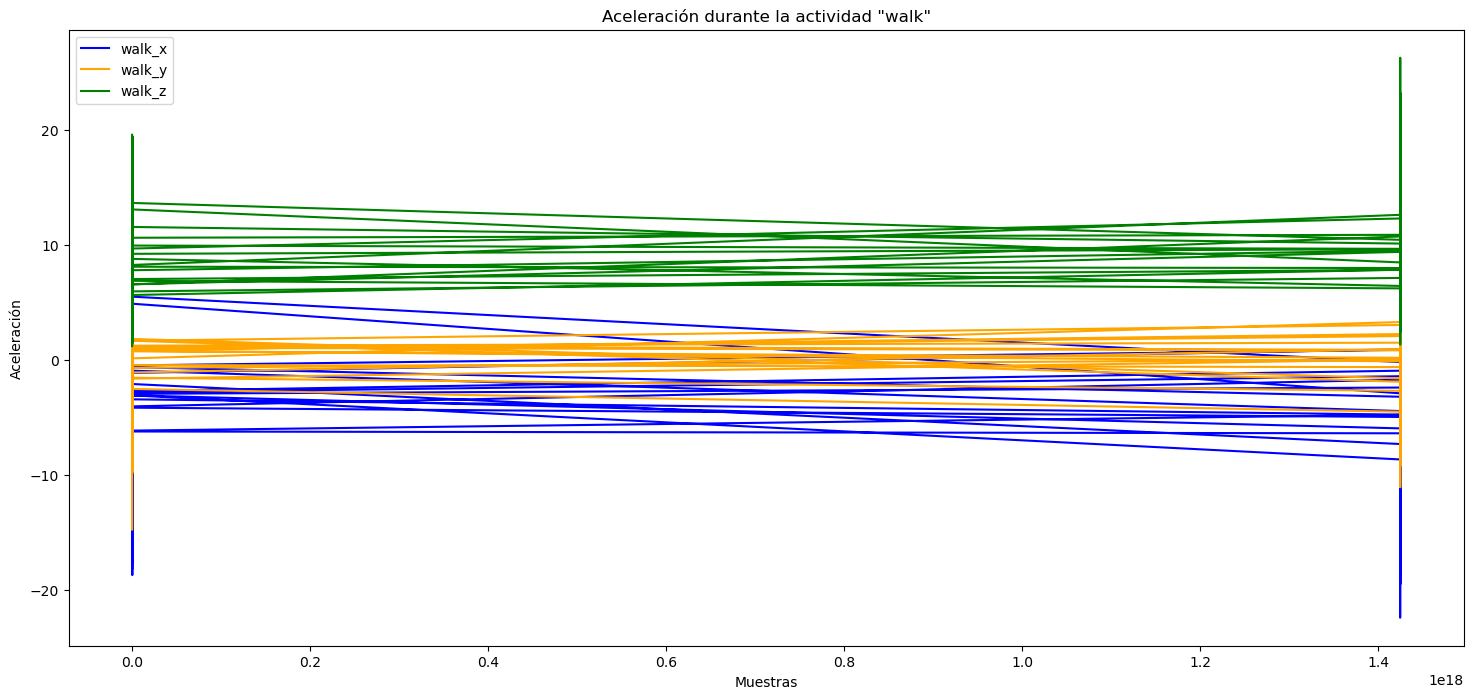

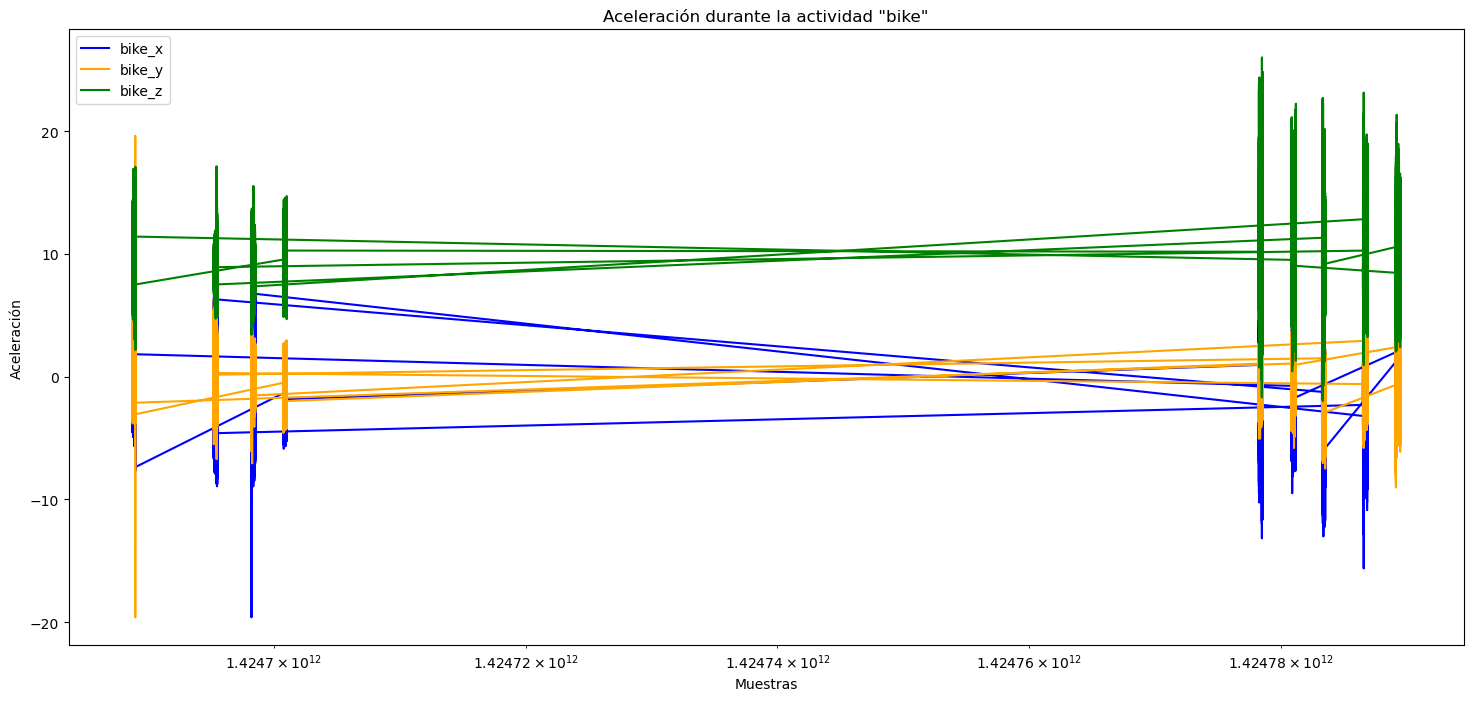

In [17]:
# Grafica de la grafica de la aceleracion por ejes y actividades entre 'walk' y 'bike'

#Separar los tiempos por listas cuando la separacion entre grupos de tiempos es grande

walk_time = walk['Creation_Time']
walk_x = walk['x']
walk_y = walk['y']
walk_z = walk['z']

bike_x = bike['x']
bike_y = bike['y']
bike_z = bike['z']
bike_time = bike['Arrival_Time']


plt.figure(figsize=(18, 8))
plt.plot(walk_time.values, walk_x.values, label='walk_x', color='blue')
plt.plot(walk_time.values, walk_y.values, label='walk_y', color='orange')
plt.plot(walk_time.values, walk_z.values, label='walk_z', color='green')
plt.title('Aceleración durante la actividad "walk"')
plt.xlabel('Muestras')
plt.ylabel('Aceleración')
#plt.xscale('log')
plt.legend()
plt.show()



plt.figure(figsize=(18, 8))
plt.plot(bike_time.values, bike_x.values, label='bike_x', color='blue')
plt.plot(bike_time.values, bike_y.values, label='bike_y', color='orange')
plt.plot(bike_time.values, bike_z.values, label='bike_z', color='green')
plt.title('Aceleración durante la actividad "bike"')
plt.xlabel('Muestras')
plt.ylabel('Aceleración')
plt.xscale('log')
plt.legend()
plt.show()

# Grafica de la grafica de la aceleracion por ejes y actividades entre 'walk' y 'bike'

#Separar los tiempos por listas cuando la separacion entre grupos de tiempos es grande

walk_time = walk['Arrival_Time']
walk_x = walk['x']
walk_y = walk['y']
walk_z = walk['z']

bike_x = bike['x']
bike_y = bike['y']
bike_z = bike['z']
bike_time = bike['Arrival_Time']


plt.figure(figsize=(18, 8))
plt.plot(walk_time.values, walk_x.values, label='walk_x', color='blue')
plt.plot(walk_time.values, walk_y.values, label='walk_y', color='orange')
plt.plot(walk_time.values, walk_z.values, label='walk_z', color='green')
plt.title('Aceleración durante la actividad "walk"')
plt.xlabel('Muestras')
plt.ylabel('Aceleración')
plt.xscale('log')
plt.legend()
plt.show()



plt.figure(figsize=(18, 8))
plt.plot(bike_time.values, bike_x.values, label='bike_x', color='blue')
plt.plot(bike_time.values, bike_y.values, label='bike_y', color='orange')
plt.plot(bike_time.values, bike_z.values, label='bike_z', color='green')
plt.title('Aceleración durante la actividad "bike"')
plt.xlabel('Muestras')
plt.ylabel('Aceleración')
plt.xscale('log')
plt.legend()
plt.show()

# Ejemplo: Agrupar tiempos por actividad
print("Tiempos agrupados por actividad:")
grouped_times = Phones_accelerometer.groupby('gt')['Arrival_Time'].apply(list)
print(grouped_times)

# Ejemplo: Agrupar tiempos en bins (rangos) para 'walk'
walk_times = walk['Arrival_Time']
bins = pd.cut(walk_times, bins=10)  # 10 bins automáticos
print("\nTiempos de 'walk' agrupados en 10 bins:")
print(bins.value_counts().sort_index())

In [25]:
# Solución
print('Medias de las muestras de la actividad "walk":')
print(walk.describe().loc['mean'])
print('==============================================================')
print('Desviación estándar de las muestras de la actividad "walk":')
print(walk.describe().loc['std'])
print('==============================================================')
print('Mínimo de las muestras de la actividad "walk":')
print(walk.describe().loc['min'])
print('==============================================================')
print('Máximo de las muestras de la actividad "walk":')
print(walk.describe().loc['max'])

Medias de las muestras de la actividad "walk":
Index            1.063220e+05
Arrival_Time     1.424745e+12
Creation_Time    6.891290e+17
x               -2.909116e+00
y                1.581895e-01
z                9.070242e+00
Name: mean, dtype: float64
Desviación estándar de las muestras de la actividad "walk":
Index            4.627288e+04
Arrival_Time     4.384051e+07
Creation_Time    7.119304e+17
x                3.179188e+00
y                1.787383e+00
z                2.787167e+00
Name: std, dtype: float64
Mínimo de las muestras de la actividad "walk":
Index            1.330000e+02
Arrival_Time     1.424688e+12
Creation_Time    1.302074e+12
x               -2.239941e+01
y               -1.475427e+01
z                1.197101e+00
Name: min, dtype: float64
Máximo de las muestras de la actividad "walk":
Index            2.005670e+05
Arrival_Time     1.424788e+12
Creation_Time    1.424790e+18
x                1.772906e+01
y                1.398645e+01
z                2.629282e+01


In [26]:
print('Medias de las muestras de la actividad "sit":')
print(sit.describe().loc['mean'])
print('==============================================================')
print('Desviación estándar de las muestras de la actividad "sit":')
print(sit.describe().loc['std'])
print('==============================================================')
print('Mínimo de las muestras de la actividad "sit":')
print(sit.describe().loc['min'])
print('==============================================================')
print('Máximo de las muestras de la actividad "sit":')
print(sit.describe().loc['max'])

Medias de las muestras de la actividad "sit":
Index            5.360638e+04
Arrival_Time     1.424741e+12
Creation_Time    7.044035e+17
x                3.762870e+00
y                1.552490e-01
z                8.438220e+00
Name: mean, dtype: float64
Desviación estándar de las muestras de la actividad "sit":
Index            2.826216e+04
Arrival_Time     4.395960e+07
Creation_Time    7.122630e+17
x                2.949414e+00
y                8.045728e-01
z                1.807950e+00
Name: std, dtype: float64
Mínimo de las muestras de la actividad "sit":
Index            0.000000e+00
Arrival_Time     1.424687e+12
Creation_Time    8.297821e+11
x               -3.380613e+00
y               -3.370994e+00
z               -3.064578e-01
Name: min, dtype: float64
Máximo de las muestras de la actividad "sit":
Index            1.171350e+05
Arrival_Time     1.424788e+12
Creation_Time    1.424790e+18
x                1.123183e+01
y                4.596867e+00
z                1.195171e+01
Name

In [27]:
print('Medias de las muestras de la actividad "stand":')
print(stand.describe().loc['mean'])
print('==============================================================')
print('Desviación estándar de las muestras de la actividad "stand":')
print(stand.describe().loc['std'])
print('==============================================================')
print('Mínimo de las muestras de la actividad "stand":')
print(stand.describe().loc['min'])
print('==============================================================')
print('Máximo de las muestras de la actividad "stand":')
print(stand.describe().loc['max'])

Medias de las muestras de la actividad "stand":
Index            2.250609e+04
Arrival_Time     1.424743e+12
Creation_Time    7.009364e+17
x               -2.419891e+00
y                3.533109e-01
z                9.194293e+00
Name: mean, dtype: float64
Desviación estándar de las muestras de la actividad "stand":
Index            1.946083e+04
Arrival_Time     4.393796e+07
Creation_Time    7.122170e+17
x                2.141182e+00
y                9.512365e-01
z                7.283199e-01
Name: std, dtype: float64
Mínimo de las muestras de la actividad "stand":
Index            0.000000e+00
Arrival_Time     1.424687e+12
Creation_Time    4.507724e+11
x               -8.243179e+00
y               -3.279571e+00
z                5.181053e+00
Name: min, dtype: float64
Máximo de las muestras de la actividad "stand":
Index            1.045350e+05
Arrival_Time     1.424788e+12
Creation_Time    1.424789e+18
x                7.048442e+00
y                4.137129e+00
z                1.492066e

**Interpretación:**



In [ ]:
print('Medias de las muestras de la actividad "bike":')
print(bike.describe().loc['mean'])
print('==============================================================')
print('Desviación estándar de las muestras de la actividad "bike":')
print(bike.describe().loc['std'])
print('==============================================================')
print('Mínimo de las muestras de la actividad "bike":')
print(bike.describe().loc['min'])
print('==============================================================')
print('Máximo de las muestras de la actividad "bike":')
print(bike.describe().loc['max'])

In [ ]:
print('Medias de las muestras de la actividad "stairup":')
print(up.describe().loc['mean'])
print('==============================================================')
print('Desviación estándar de las muestras de la actividad "stairup":')
print(up.describe().loc['std'])
print('==============================================================')
print('Mínimo de las muestras de la actividad "stairup":')
print(up.describe().loc['min'])
print('==============================================================')
print('Máximo de las muestras de la actividad "stairup":')
print(up.describe().loc['max'])

In [ ]:
print('Medias de las muestras de la actividad "stairdown":')
print(down.describe().loc['mean'])
print('==============================================================')
print('Desviación estándar de las muestras de la actividad "stairdown":')
print(down.describe().loc['std'])
print('==============================================================')
print('Mínimo de las muestras de la actividad "stairdown":')
print(down.describe().loc['min'])
print('==============================================================')
print('Máximo de las muestras de la actividad "stairdown":')
print(down.describe().loc['max'])

**Visualización extra:** Histogramas de cada eje y Boxplots.

In [8]:
# Solución

In [9]:
# Solución

## Ejercicio 3: Filtrar actividades específicas (walk vs sit)

🔹 **Qué hacer:**  
- Filtra el DataFrame `df_subset_ph_acc` para obtener dos nuevos subconjuntos: uno con los registros de la actividad `walk` y otro de `sit`.
- Muestra el número de registros para cada actividad.
- Representa los resultados en un **gráfico de barras** comparando el número de muestras de `walk` vs `sit`.

🔹 **¿Por qué es importante?:**  
- Filtrar datos por condiciones específicas es fundamental para realizar análisis focalizados.
- Visualizar el balance entre clases ayuda a detectar posibles problemas de desbalanceo, muy relevantes para la calidad de los modelos de predicción.

🔹 **Preguntas para reflexión:**  
- ¿Es equilibrado el número de muestras entre `walk` y `sit`?
- ¿Qué problemas podría traer un desbalance muy grande entre clases?
- ¿Cómo podrías corregir un desbalance si fuera necesario?


In [10]:
# Solución

**Interpretación:**



**Visualización extra:** Comparativa del número de muestras.

In [11]:
# Solución


## Ejercicio 4: Agrupación por actividad y Gráfico comparativo de actividades
🔹 **Qué hacer:** 
- Agrupar por tipo de actividad y calcular medias de `x`, `y`, `z`.
- Hacer un gráfico de barras de medias de `x`, `y`, `z` para 'walk', 'sit' y 'stairsup'.

🔹 **¿Por qué es importante?:** 
- Permite comparar globalmente la dinámica de cada actividad y ver si son fáciles de distinguir.
- Visualizar los patrones ayuda a detectar actividades más fáciles o difíciles de clasificar.

🔹 **Interpretación esperada:** Actividades dinámicas como caminar, correr, subir escaleras deberían tener aceleraciones mayores que sentarse.

🔹 **Preguntas para reflexión:**
- ¿Qué actividades parecen más similares entre sí?
- ¿Qué actividades podrían confundirse en un modelo de clasificación?
- ¿Qué actividad tiene el perfil de aceleración más alto?
- ¿Podríamos usar esta diferencia directamente como una característica para clasificación?




In [12]:
# Solución

## Ejercicio 5: Clasificación de actividades

🔹 **Qué hacer:**  
- Crea una nueva columna `activity_type` en el DataFrame, clasificando las actividades de la columna `gt` en **"Dinámica"** (`walk`, `stairsup`, `stairsdown`, `run`, `bike`) o **"Estática"** (el resto).  
- Muestra una tabla con las primeras filas (`head()`) mostrando `gt` y `activity_type`.  
- Representa en una **gráfica de barras** la cantidad de muestras de actividades "Dinámica" y "Estática".

🔹 **¿Por qué es importante?:**  
- Saber transformar datos categóricos en grupos más simples es clave para entender mejor los datos y preparar análisis o modelos más robustos.  
- Aprenderás a crear nuevas columnas de forma programada, un paso esencial en cualquier proyecto de análisis de datos.

🔹 **Preguntas para reflexión:**  
- ¿Qué pasa si agregamos o quitamos actividades de la clasificación?  
- ¿Crees que esta agrupación podría afectar a un modelo que predice tipos de actividad? ¿Por qué?  
- ¿Qué otras maneras de agrupar actividades se te ocurren?

In [13]:
# Solución

**Interpretación**

## Ejercicio 6: Comparativa Teléfono vs Reloj (Acelerómetro)

🔹 **Qué hacer:**  
- Filtra el DataFrame para quedarte sólo con las actividades `walk` y `sit`.  
- Crea dos subconjuntos de datos: uno para el teléfono (`ph_acc_common`) y otro para el reloj (`wat_acc_common`).  
- Representa en un **histograma** la distribución de las aceleraciones en el eje **X** para ambos dispositivos, en la misma gráfica.

🔹 **¿Por qué es importante?:**  
- Comparar datos de distintos dispositivos para las mismas actividades permite entender mejor las diferencias de captación de los sensores.  
- Aprenderás a utilizar filtros en pandas y a superponer múltiples distribuciones en un solo gráfico para compararlas de manera visual.

🔹 **Preguntas para reflexión:**  
- ¿Observas diferencias claras en las distribuciones de aceleración entre el teléfono y el reloj?  
- ¿Qué factores pueden causar esas diferencias, incluso realizando la misma actividad?  
- ¿Qué implicaciones crees que tendría esta diferencia al entrenar un modelo de predicción?


In [14]:
# Solución

**Visualización extra:** Histograma comparativo de aceleraciones en 'walk' y 'sit'.

In [15]:
# Solución

**Interpretación**

## Ejercicio 7: Comparativa Acelerómetro vs Giroscopio (Teléfono)

🔹 **Qué hacer:**  
- Filtra los datos del giroscopio del teléfono para quedarte solo con las actividades `walk` y `sit`, igual que en el acelerómetro.
- Representa en un **histograma** las distribuciones de aceleraciones en el eje **X** para el acelerómetro (`ph_acc_common`) y para el giroscopio (`ph_gyr_common`), en la misma gráfica.

🔹 **¿Por qué es importante?:**  
- Ver qué sensor aporta más información según el tipo de actividad ayuda a optimizar modelos de reconocimiento de actividades.
- Entender qué diferencias existen entre acelerómetro y giroscopio permite seleccionar el sensor adecuado para cada problema.

🔹 **Preguntas para reflexión:**  
- ¿Qué diferencias ves entre las señales del acelerómetro y el giroscopio?
- ¿En qué tipos de actividades crees que el giroscopio podría ser más útil que el acelerómetro?
- ¿Podría ser interesante combinar la información de ambos sensores?


In [16]:
# Solución

**Visualización extra:** Histogramas superpuestos de aceleraciones vs velocidades angulares (eje X).

In [17]:
# Solución

**Interpretación**

## Ejercicio 8: Correlación entre sensores

🔹 **Qué hacer:**  
- Une los datos del acelerómetro (`ph_acc_common`) y del giroscopio (`ph_gyr_common`) usando solo los ejes `x`, `y`, `z`, ajustando los índices.
- Crea un nuevo DataFrame combinando ambos sensores.
- Calcula y visualiza la **matriz de correlación** entre todas las variables usando un **mapa de calor**.

🔹 **¿Por qué es importante?:**  
- Entender la correlación entre sensores ayuda a detectar si hay redundancia (información duplicada) o complementariedad (información adicional).
- Saber qué variables están correlacionadas permite optimizar modelos, eliminar variables innecesarias o detectar relaciones ocultas en los datos.

🔹 **Preguntas para reflexión:**  
- ¿Qué pares de variables presentan mayor correlación?
- ¿Existe más correlación entre ejes del mismo sensor o entre sensores diferentes?
- ¿Cómo podrías usar esta información para mejorar un modelo de predicción?


In [18]:
# Solución

**Interpretación**